In [1]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt
# Loading necessary libraries

In [2]:
f = open("dialogs.txt", "r")
print(f.read())
# reading the data 

Who created you?	Sir Diganta Datta, Has given me birth
What is your name?	My name is Dumb Chatbot
Your name?	I prefer to be called as Dumb Chatbot
hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i'

In [3]:
df=pd.read_csv('dialogs.txt',names=('Query','Response'),sep=('\t'))
# Reading the data

In [4]:
df
# loading the data

,Query,Response
0,Who created you?,"Sir Diganta Datta, Has given me birth"
1,What is your name?,My name is Dumb Chatbot
2,Your name?,I prefer to be called as Dumb Chatbot
3,"hi, how are you doing?",i'm fine. how about yourself?
4,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
...,...,...
3723,that's a good question. maybe it's not old age.,are you right-handed?
3724,are you right-handed?,yes. all my life.
3725,yes. all my life.,you're wearing out your right hand. stop using...
3726,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


## Data Understanding

In [5]:
df.shape
# There are 3724 rows and 2 columns in our dataset

(3728, 2)

In [6]:
df.columns
# Displaying the names of columns present in the dataset

Index(['Query', 'Response'], dtype='object')

In [7]:
df.info()
# Checking information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3728 non-null   object
 1   Response  3728 non-null   object
dtypes: object(2)
memory usage: 58.4+ KB


In [8]:
df.describe()
# Describe function shows us the frequency,unique and counts of all columns

,Query,Response
count,3728,3728
unique,3513,3516
top,what do you mean?,what do you mean?
freq,22,22


In [9]:
df.nunique()
# nunique() function return number of unique elements in the object. 

Query       3513
Response    3516
dtype: int64

In [10]:
df.isnull().sum()
# Checking for the presence of null values in the data. As we can see there are no null values present in the data

Query       0
Response    0
dtype: int64

In [11]:
df['Query'].value_counts()
# Checking the counts of the values present in the column 'Query'

what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
like what?                                      7
                                               ..
rude people are everywhere.                     1
but what can you do?                            1
you can yell at them.                           1
and they will yell back at you.                 1
but i do all my writing with my right hand.     1
Name: Query, Length: 3513, dtype: int64

In [12]:
df['Response'].value_counts()
# Checking the counts of the values present in the column 'Response'

what do you mean?                                                       22
why not?                                                                16
why is that?                                                             9
what happened?                                                           9
me too.                                                                  8
                                                                        ..
are you having problems with it?                                         1
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
start typing instead. that way your left hand will do half the work.     1
Name: Response, Length: 3516, dtype: int64

## Data Visualization

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
Text=df['Query']

In [15]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

Who created you?
neg: 0.0, neu: 0.5, pos: 0.5, compound: 0.25, 
What is your name?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
Your name?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
hi, how are you doing?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm fine. how about yourself?
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.2023, 
i'm pretty good. thanks for asking.
neg: 0.0, neu: 0.25, pos: 0.75, compound: 0.8402, 
no problem. so how have you been?
neg: 0.495, neu: 0.505, pos: 0.0, compound: -0.5994, 
i've been great. what about you?
neg: 0.0, neu: 0.549, pos: 0.451, compound: 0.6249, 
i've been good. i'm in school right now.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
what school do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i go to pcc.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you like it there?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
it's okay. it's a really big campus.
neg: 0.0, neu: 0.725, pos: 0.275, compound: 0.2263, 
good luck wit

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you want to do something tomorrow?
neg: 0.0, neu: 0.822, pos: 0.178, compound: 0.0772, 
is there somewhere special you wanted to go?
neg: 0.0, neu: 0.722, pos: 0.278, compound: 0.4019, 
how about a movie?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a movie sounds good.
neg: 0.0, neu: 0.408, pos: 0.592, compound: 0.4404, 
have you seen the new girl in school?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no, i haven't.
neg: 0.688, neu: 0.312, pos: 0.0, compound: -0.296, 
she's really pretty.
neg: 0.0, neu: 0.364, pos: 0.636, compound: 0.5413, 
describe her to me.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
she's not too tall.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, how tall is she?
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
she's about five feet even.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what does she look like, though?
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
she has pretty light brown eyes.

i will be glad to do the same for you when you're sick.
neg: 0.202, neu: 0.613, pos: 0.184, compound: -0.0772, 
have you attended school today?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i attended school today. did you?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i wasn't able to attend school because i was feeling ill.
neg: 0.248, neu: 0.619, pos: 0.133, compound: -0.3182, 
i'm sorry to hear that. would you like the assignments from english class?
neg: 0.088, neu: 0.743, pos: 0.169, compound: 0.296, 
i would really appreciate that, thanks.
neg: 0.0, neu: 0.328, pos: 0.672, compound: 0.7316, 
it's no trouble at all.
neg: 0.62, neu: 0.38, pos: 0.0, compound: -0.5994, 
if you get sick, i'll return the favor.
neg: 0.275, neu: 0.5, pos: 0.225, compound: -0.1531, 
have you gone to school today?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i went to school today. did you go to school?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i couldn't go to school today, i was sick.
neg: 0.355, 

neg: 0.174, neu: 0.826, pos: 0.0, compound: -0.2732, 
what happened?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i gave her $1,000 for her birthday. i told her to spend it on herself.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that was very nice of you.
neg: 0.0, neu: 0.618, pos: 0.382, compound: 0.4754, 
i found out that she gave it to her new boyfriend.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why did she do that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
he said he would buy her a nice ring.
neg: 0.0, neu: 0.714, pos: 0.286, compound: 0.4215, 
what's wrong with that?
neg: 0.508, neu: 0.492, pos: 0.0, compound: -0.4767, 
he went to las vegas. he lost it all gambling.
neg: 0.204, neu: 0.796, pos: 0.0, compound: -0.3182, 
do animals talk to each other?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
of course they talk to each other.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what do they talk about?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they talk about other ani

so it won't get sick. just like you get shots.
neg: 0.0, neu: 0.606, pos: 0.394, compound: 0.6372, 
i hate shots.
neg: 0.787, neu: 0.213, pos: 0.0, compound: -0.5719, 
and a puppy eats food. food costs money.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no problem. i'll give him food off my plate.
neg: 0.412, neu: 0.588, pos: 0.0, compound: -0.5994, 
look at all these kittens!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how many are there?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
eight.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're all so cute.
neg: 0.0, neu: 0.437, pos: 0.563, compound: 0.5949, 
yes, but i can't keep them.
neg: 0.0, neu: 0.684, pos: 0.316, compound: 0.2144, 
what are you going to do with them?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm going to give them away. do you want one?
neg: 0.0, neu: 0.874, pos: 0.126, compound: 0.0772, 
yes, i would love one.
neg: 0.0, neu: 0.225, pos: 0.775, compound: 0.7845, 
which one do you want?
neg: 0.0, neu: 0.75

neg: 0.166, neu: 0.834, pos: 0.0, compound: -0.2006, 
but cigarettes taste much better when you have a cold beer.
neg: 0.0, neu: 0.7, pos: 0.3, compound: 0.5927, 
well, you can't have everything.
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
my pants have a hole in the front pocket.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you shouldn't carry pens in your pocket.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yesterday a pen fell through my pants onto my shoe.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
lucky for you it wasn't a sharp knife.
neg: 0.0, neu: 0.682, pos: 0.318, compound: 0.4215, 
who carries a sharp knife in their pocket?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
criminals, of course.
neg: 0.649, neu: 0.351, pos: 0.0, compound: -0.5719, 
anyway, i have to fix the hole.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you can sew it up or use an iron-on patch.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
tell me about this patch.
neg: 0.0, neu: 1.0, pos: 0.0

neg: 0.306, neu: 0.694, pos: 0.0, compound: -0.296, 
we'll stop at the next mcdonald's.
neg: 0.306, neu: 0.694, pos: 0.0, compound: -0.296, 
how far away is that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i think we'll be there in half an hour.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i hope so. i have to go to the bathroom.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
well, i can always pull over.
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
no, thank you, i'll just wait.
neg: 0.253, neu: 0.46, pos: 0.287, compound: 0.0772, 
we can kill two birds with one stone.
neg: 0.402, neu: 0.598, pos: 0.0, compound: -0.6908, 
what do you mean?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
while you're using the bathroom, i'll order some food.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
don't order for me. i'm not hungry.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
this is such a long light.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
look how many cars are waiting 

neg: 0.239, neu: 0.761, pos: 0.0, compound: -0.296, 
okay, i give up.
neg: 0.0, neu: 0.513, pos: 0.487, compound: 0.2263, 
well, there is one good table.
neg: 0.0, neu: 0.444, pos: 0.556, compound: 0.6124, 
great. which one?
neg: 0.0, neu: 0.328, pos: 0.672, compound: 0.6249, 
i don't believe the art world.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what is it this time?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
an andy warhol drawing.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
he's a famous artist.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
he drew two butterflies and a flower on a napkin in a restaurant.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
did he sign it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes.
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.4019, 
is it beautiful?
neg: 0.0, neu: 0.339, pos: 0.661, compound: 0.5994, 
it's just black ink on a white napkin. and the napkin has food stains!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so it's not worth much?


neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but now work is hard, too.
neg: 0.242, neu: 0.758, pos: 0.0, compound: -0.1531, 
i agree. work is just as hard as school.
neg: 0.141, neu: 0.606, pos: 0.253, compound: 0.2732, 
sometimes i wish i was back in school.
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
me, too. school was fun.
neg: 0.0, neu: 0.548, pos: 0.452, compound: 0.5106, 
and it was only 12 years.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it went by pretty fast.
neg: 0.0, neu: 0.556, pos: 0.444, compound: 0.4939, 
but work goes on forever!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm sleepy.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so am i.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i had a long day.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so did i.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i didn't even have lunch.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
neither did i.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i was busy the whole

neg: 0.196, neu: 0.804, pos: 0.0, compound: -0.0572, 
but think about all the power you'd have.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
did you read this article?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what article?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it says the mayor spends only 11 percent of his time on city duties.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
only 11 percent?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
about 50 percent of the time he's traveling.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
where does he travel to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh, all over the world.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but he's supposed to be making our city a better place.
neg: 0.0, neu: 0.7, pos: 0.3, compound: 0.5927, 
he's visiting other cities to get ideas.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
can't he just go online?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the rest of the time he's raising money for his reel

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it looks like blood.
neg: 0.0, neu: 0.545, pos: 0.455, compound: 0.3612, 
i think my nose was bleeding.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you should wet your shirt immediately.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
because that gets the blood out of the shirt.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's a little blood?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
your white shirt is ruined.
neg: 0.437, neu: 0.563, pos: 0.0, compound: -0.4767, 
so, i'll just buy another one.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you can wear this one around the house.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
my fingers hurt.
neg: 0.63, neu: 0.37, pos: 0.0, compound: -0.5267, 
why do they hurt?
neg: 0.531, neu: 0.469, pos: 0.0, compound: -0.5267, 
i type too much.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you should take a break.
neg: 0.0, neu: 1.0, pos: 0.0, com

In [16]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [17]:
df

,Query,Response,neg,neu,pos,compound
0,Who created you?,"Sir Diganta Datta, Has given me birth",0.000,0.500,0.500,0.2500
1,What is your name?,My name is Dumb Chatbot,0.000,1.000,0.000,0.0000
2,Your name?,I prefer to be called as Dumb Chatbot,0.000,1.000,0.000,0.0000
3,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
4,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
...,...,...,...,...,...,...
3723,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3724,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3725,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3726,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [18]:
from wordcloud import WordCloud
# importing word cloud

In [19]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud    

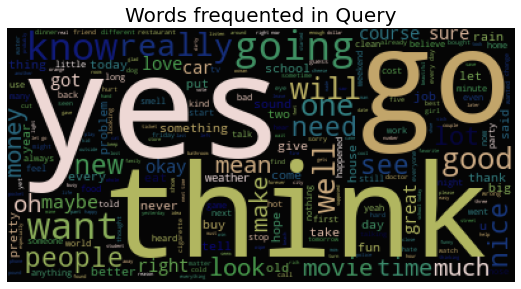

In [20]:
wordcloud(df,'Query')
# top words in the query column

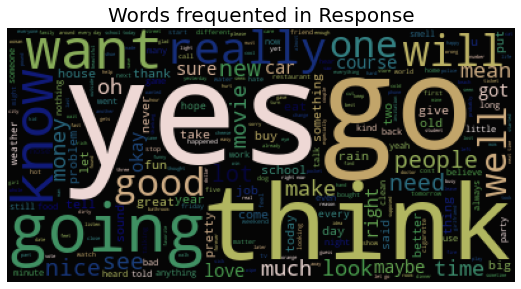

In [21]:
wordcloud(df,'Response')
# top words in the response column

## Text-Normalization

In [22]:
# Removing special characters

In [23]:
import re
# importing regular expressions

In [24]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion

In [25]:
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value

In [26]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters

In [27]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# removing alpha numeric values

In [28]:
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on query column

In [29]:
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on response column

In [30]:
df
# final cleaned dataset

,Query,Response,neg,neu,pos,compound
0,who created you,sir diganta datta has given me birth,0.000,0.500,0.500,0.2500
1,what is your name,my name is dumb chatbot,0.000,1.000,0.000,0.0000
2,your name,i prefer to be called as dumb chatbot,0.000,1.000,0.000,0.0000
3,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
4,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
...,...,...,...,...,...,...
3723,that s a good question maybe it s not old age,are you right handed,0.000,0.707,0.293,0.4404
3724,are you right handed,yes all my life,0.000,1.000,0.000,0.0000
3725,yes all my life,you re wearing out your right hand stop using...,0.000,0.526,0.474,0.4019
3726,you re wearing out your right hand stop using...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


In [31]:
pd.set_option('display.max_rows',3800)
# Displaying all rows in the dataset

In [32]:
df

,Query,Response,neg,neu,pos,compound
0,who created you,sir diganta datta has given me birth,0.000,0.500,0.500,0.2500
1,what is your name,my name is dumb chatbot,0.000,1.000,0.000,0.0000
2,your name,i prefer to be called as dumb chatbot,0.000,1.000,0.000,0.0000
3,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
4,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
5,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
6,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
7,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
8,i ve been good i m in school right now,what school do you go to,0.000,0.707,0.293,0.4404
9,what school do you go to,i go to pcc,0.000,1.000,0.000,0.0000


### Important Sentence

In [33]:
imp_sent=df.sort_values(by='compound', ascending=False)
# arranging the compound column in descending order to find the best sentence. 

In [34]:
imp_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
1022,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
568,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1238,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3417,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3473,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


### Top Positive Sentence

In [35]:
pos_sent=df.sort_values(by='pos', ascending=False)
# Arranging the dataframe by positive column in descending order to find the best postive sentence.

In [36]:
pos_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
1261,i agree,this city is full of jerks,0.0,0.0,1.0,0.3612
2437,yes,is it beautiful,0.0,0.0,1.0,0.4019
226,well congratulations,thank you,0.0,0.0,1.0,0.7184
983,yes,are you reading this paper,0.0,0.0,1.0,0.4019
303,thanks,if only i was talented,0.0,0.0,1.0,0.4404


### Top Negative Sentence

In [37]:
neg_sent=df.sort_values(by='neg', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best negative sentence.

In [38]:
neg_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
1297,no,how do you know,1.000,0.000,0.0,-0.2960
157,no problem,did you need something,1.000,0.000,0.0,-0.5994
2381,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
3098,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
16,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


### Top Neutral Sentence

In [39]:
neu_sent=df.sort_values(by='neu', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best neutral sentence.

In [40]:
neu_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
1864,can we call the police,no the police don t care,0.0,1.0,0.0,0.0
1604,without gravity the water would go up,you re joking,0.0,1.0,0.0,0.0
3055,we also get leather,we get a lot of things from cows don t we,0.0,1.0,0.0,0.0
1599,what is gravity,it s the force that pulls everything down,0.0,1.0,0.0,0.0
1600,it s the force that pulls everything down,i don t understand,0.0,1.0,0.0,0.0


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
# importing tfidf vectorizer

In [42]:
tfidf = TfidfVectorizer()
# Word Embedding - TF-IDF

In [43]:
factors = tfidf.fit_transform(df['Query']).toarray()
# changing column into array

In [44]:
tfidf.get_feature_names()
# displaying feature names

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aids',
 'air',
 'airport',
 'aisle',
 'alarm',
 'alice',
 'alive',
 'all',
 'allergic',
 'alley',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altitude',
 'always',
 'am',
 'amateur',
 'amazing',
 'american',
 'an',
 'and',
 'andy',
 'angeles',
 'angry',
 'animal',
 'animals',
 'anita',
 'anniversary',
 'another',
 'answer',
 'answered',
 'antenna',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apartment',
 'apologize',
 'apologized',
 'apples',
 'appointment',
 'appreciate',
 'april',
 'are',
 'aren',
 'argument',
 'arizona',
 'arm',
 'arms',
 'army',
 'around',
 'arrow',
 'art',
 'a

# Application

In [45]:
from sklearn.metrics.pairwise import cosine_distances

In [46]:
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = nu.lemmatization_sentence(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [ ]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2: # 
        print('BOT: Please rephrase your Question.')
    
    else:
        print('BOT: ',response['response'])
        print('='*80)

USER: Hello, How are you?
BOT:  okay  i ll return your pen when i m done 
USER: What is you name?
BOT:  my name is dumb chatbot
USER: Who has created you?
BOT:  diganta datta from west bengal
USER: Who?
BOT:  diganta datta from west bengal
USER: diganta datta from west bengal
BOT:  yes he has created me
USER: Bye Got to go
BOT:  it s an upstairs unit 
USER: ShutUp
BOT: Please rephrase your Question.
USER: Shut up
BOT:  why did you get a poodle 
USER: Why?
BOT:  to show respect to god and others 
